In [58]:
import nltk
import glob
import os
import re
import warnings; warnings.filterwarnings(action='once')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Importando os csv

path = '../data/'
all_files = glob.glob(os.path.join(path, '*.csv'))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df = df[['company_name', 'full_complain']]

In [19]:
nltk.download('stopwords')

# Preprocessamento do texto para contagem de frequencia

def pre_process(text):
    
    text = str(text)
    small_letters = re.findall(r'\b[A-zÀ-úü]+\b', text.lower())
    
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    removed_stop = [word for word in small_letters if word not in stop]
    
    clean_text = ' '.join(removed_stop)
    
    return clean_text

[nltk_data] Downloading package stopwords to /home/vitor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['processed'] = [0]*df.shape[0]
df['processed'] = df[['full_complain']].applymap(pre_process)

In [35]:
# Contagem de frequencia

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

reclamacoes = [complain for complain in df.processed]
texto = ' '.join(reclamacoes)
tokens = word_tokenize(texto, language='portuguese')

freq = FreqDist(tokens)

[nltk_data] Downloading package punkt to /home/vitor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
plt.rcParams.update({'font.size': 19})

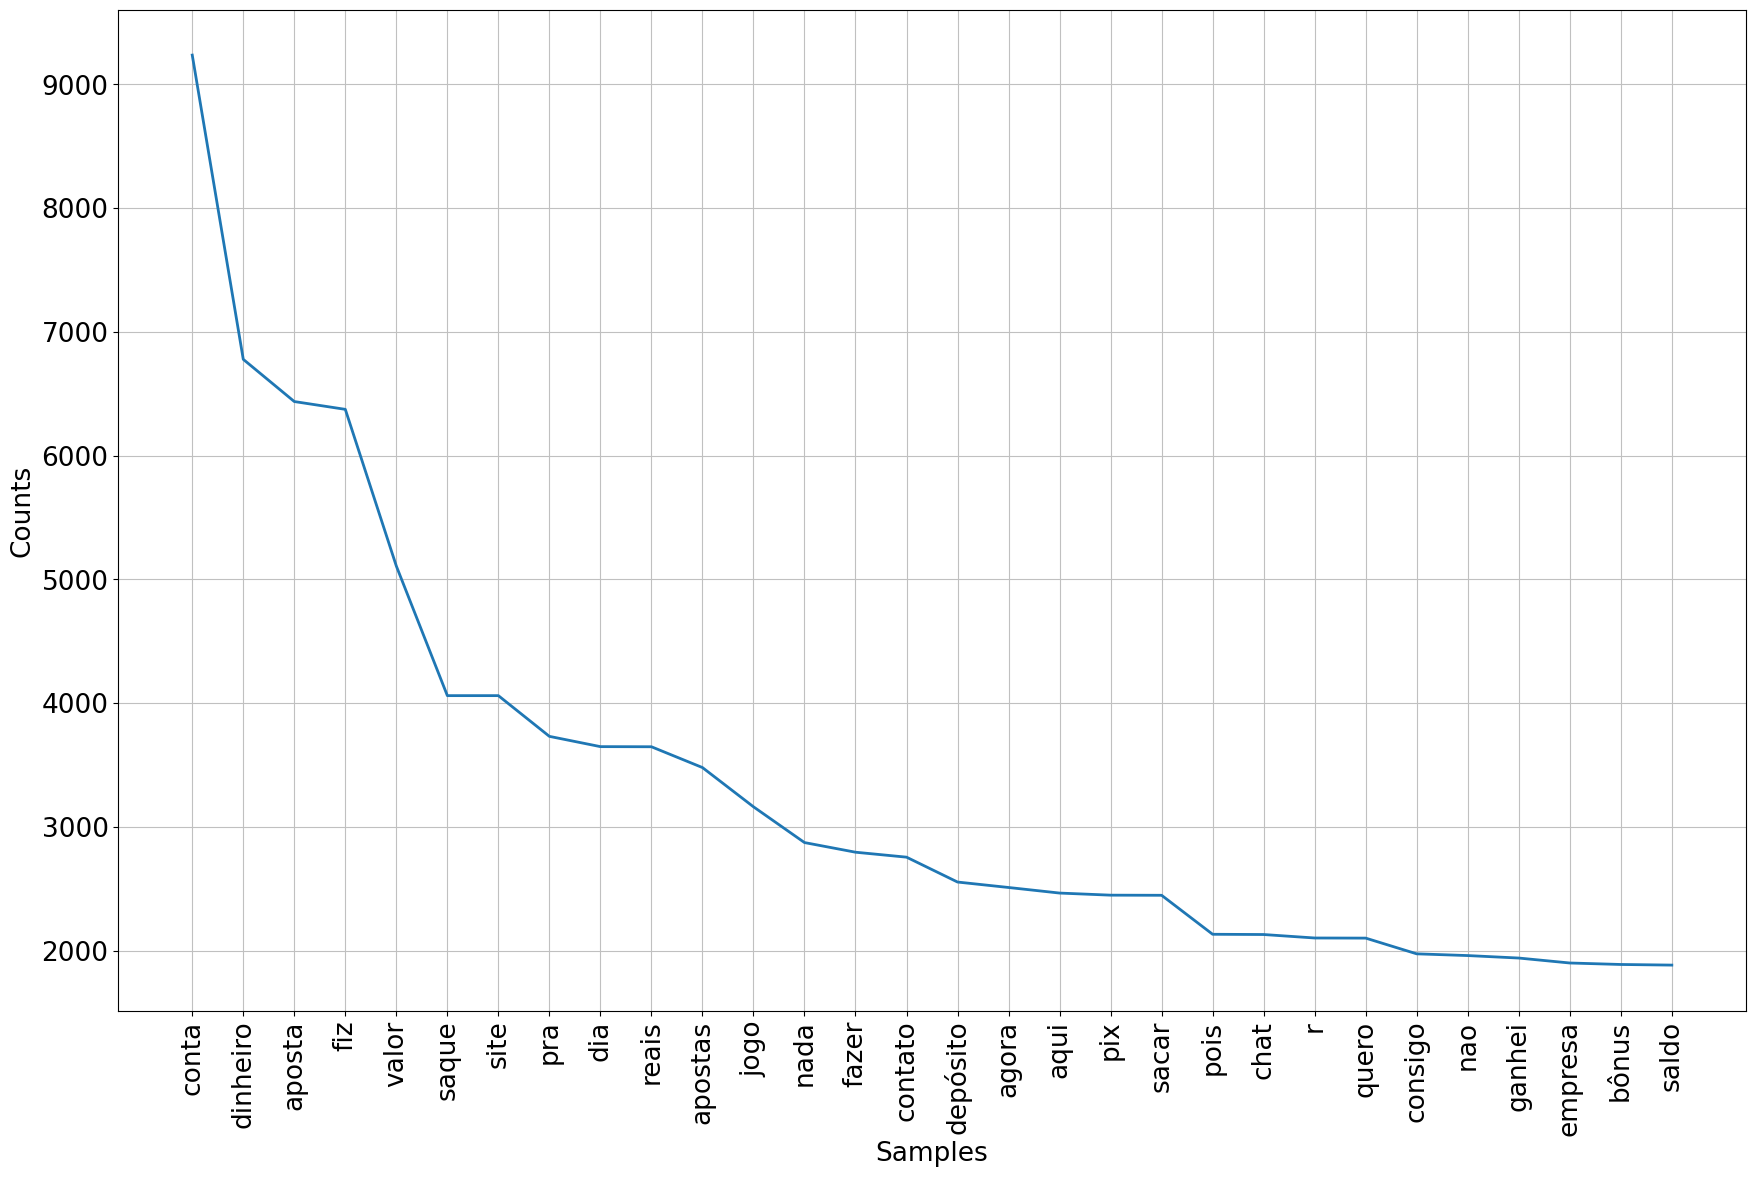

In [55]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
freq.plot(30);

In [47]:
bigrams = nltk.bigrams(tokens)

big_freq = FreqDist(bigrams)

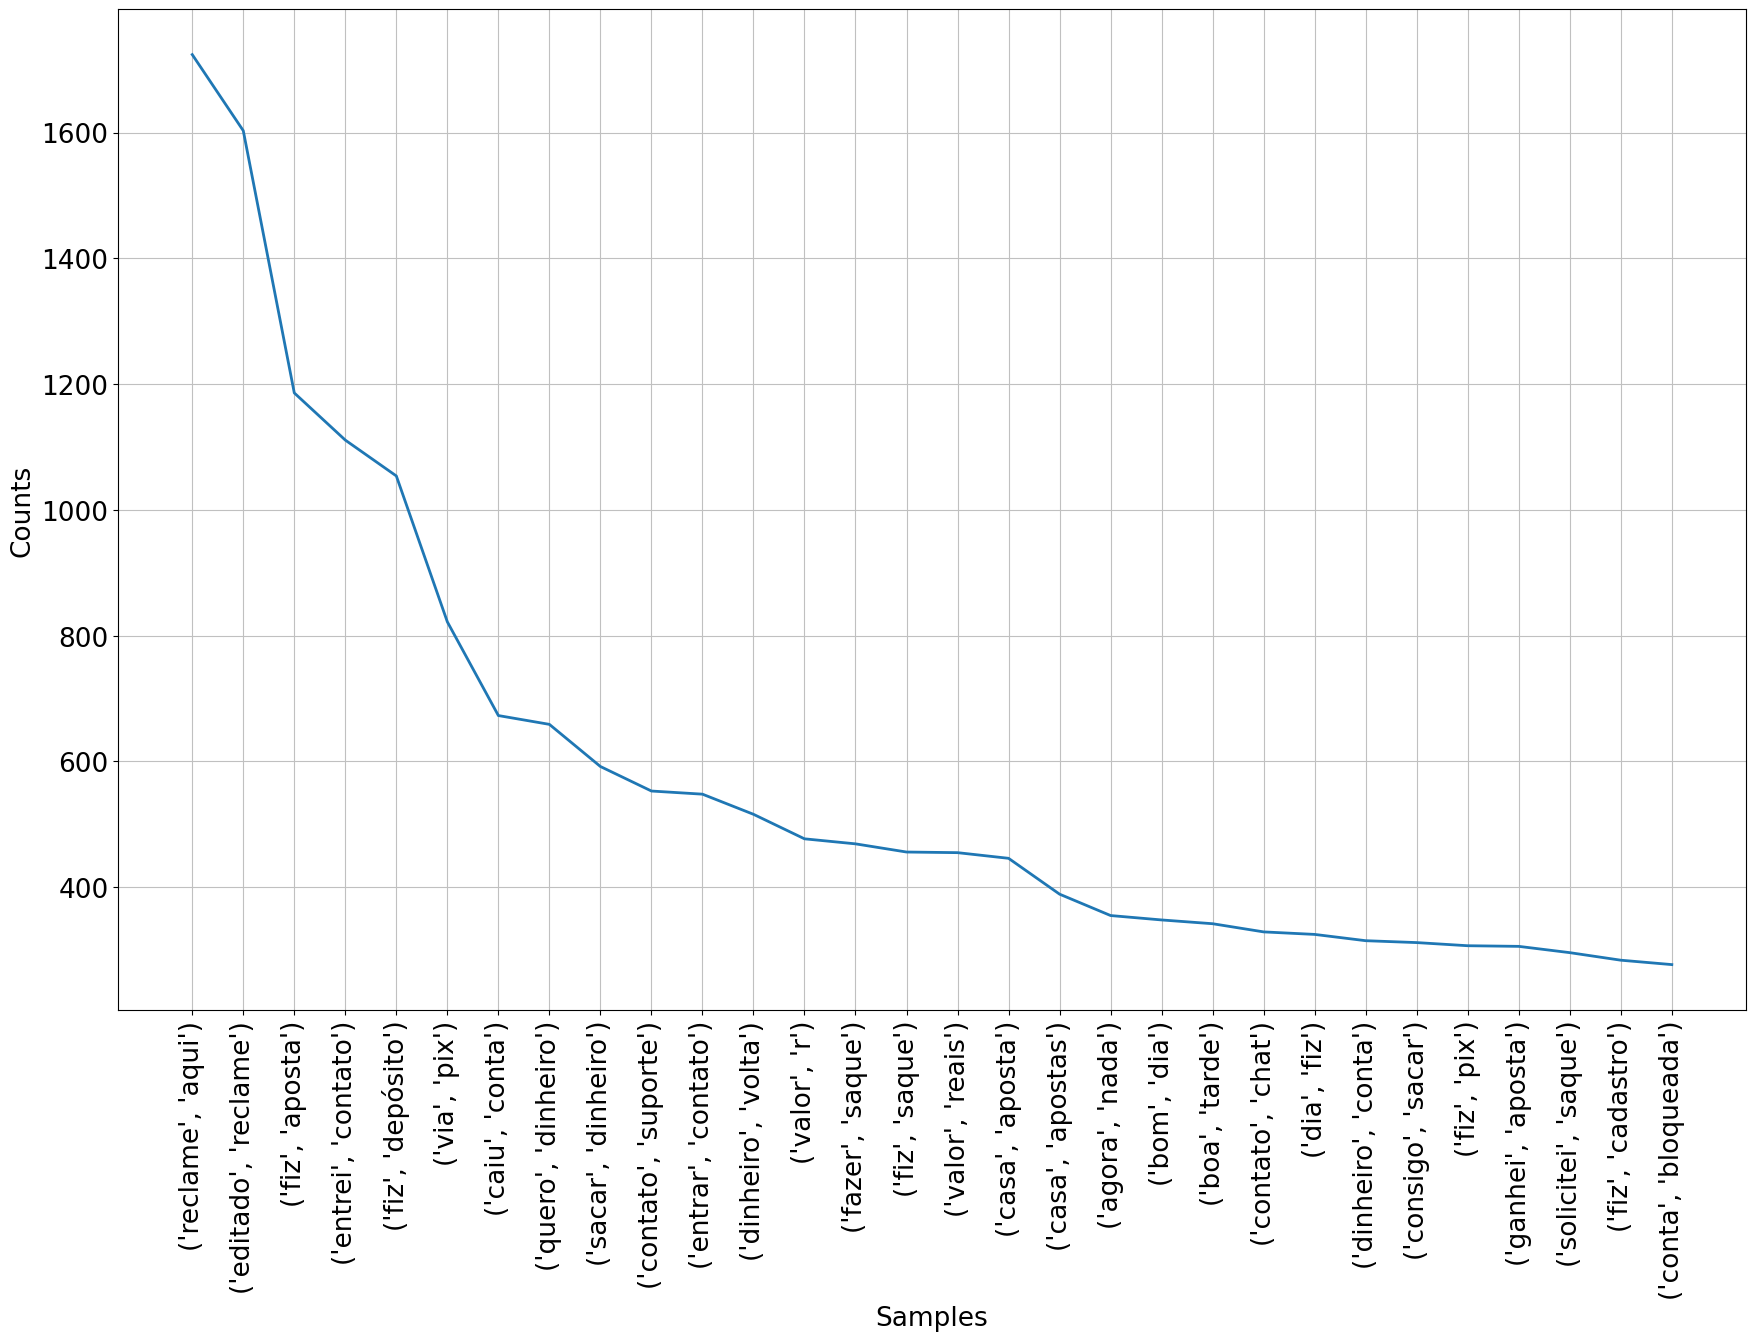

In [56]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
big_freq.plot(30);